In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import sys 
sys.path.append('./')
import check_data
import plot

In [3]:
df1 = pd.read_csv("../../data/mislabeled_samples/test_pro.tsv",sep="\t").T
df2 = pd.read_csv("../../data/mislabeled_samples/test_cli.tsv",sep="\t").set_index('sample')

# 数据统计
* shape
* describe()
* 平行坐标图
** 归一化或者不归一化
* 属性和属性 或者 与目标之间的相关性
* qq plot
* boxplot(归一化）
* 相关性的统计 热图
* logistic 回归



## 数据检查
* 查看数据的维度，其中列代表特征，行代表实例。
* 属性也被称之为预测因子、特征、独立变量、输入； 标签也通常被称之为结果、目标、依赖变量、响应。
* 当标签是数值的，称之为回归问题；当标签是类别的，称之为分类问题

### 数据的行数和列数

In [4]:
check_data.shape(df1)

该数据有80个实例(样品)，4118个属性(维度)


### 每个属性的特征检查
* na ： not available ； nan：not a number
* 计算每个属性的相关特点，例如类型（float，string），长度，缺失的个数与比例
* 添加float类型的mean，std等，string的类型
* range ： float是min和max，string是类别
* information： float是四分位数， string是个数

In [5]:
df1.head()

,A1BG,A2M,AAAS,AACS,AAGAB,AAK1,AAMDC,AARS,AARS2,AASDHPPT,...,ZNF185,ZNF207,ZNF280C,ZNF326,ZNF638,ZNF706,ZPR1,ZW10,ZYX,ZZEF1
Testing_1,3.446723,5.994520,2.168001,NaN,NaN,1.613696,NaN,4.412741,3.166511,1.056106,...,NaN,2.528991,NaN,2.245434,NaN,1.058798,1.848274,2.565798,3.597116,1.636396
Testing_2,3.669580,6.371038,2.410543,1.024838,0.991114,1.192009,NaN,4.769827,3.096463,2.355183,...,1.005540,1.976372,NaN,1.287584,1.733361,NaN,0.997150,2.265862,3.967766,1.802938
Testing_3,3.398472,6.132440,NaN,NaN,1.096724,2.132646,1.141625,4.273302,0.998518,NaN,...,NaN,1.399577,NaN,1.908988,1.126579,NaN,1.120824,2.944166,3.779964,1.756282
Testing_4,3.112875,5.645341,2.211822,1.099892,1.056902,2.060400,NaN,4.904586,2.417391,NaN,...,1.076813,2.571042,NaN,2.288274,1.081373,1.780610,1.074043,NaN,3.918465,NaN
Testing_5,3.535956,5.532811,0.987561,1.076615,NaN,NaN,1.067227,2.481525,3.285401,1.049430,...,NaN,2.523349,NaN,2.886522,NaN,1.721321,NaN,1.795269,3.535849,NaN


In [6]:
check_data.feature_type(df2)

,col,name,type,length,NA_count,missing_rate,range,information
0,0,gender,string,80,0,0.0,"Female,Male","31,49"
1,1,msi,string,80,0,0.0,"MSI-Low/MSS,MSI-High","66,14"


### 对标签或者属性的分布进行正态分布的检测

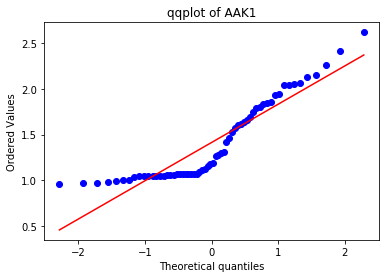

R^2 = 0.858062292643213


In [7]:
gene = 'AAK1'
r2 = plot.qqplot(df1[gene],gene)
print("R^2 = {0}".format(r2))

### 平行坐标图

画出所有属性的折线图，并按组来上色，观察分布情况

In [8]:
tt = plot.myPlot(df1.T.head(10),color_by=pd.DataFrame(df2['gender']))

In [11]:
tt.line_plot()

### 属性对（属性和标签）的交会散点图

1022finish

In [19]:
tt = plot.myPlot(df1)
tt.scatter_plot(x='A1BG',y=['AAAS','A2M'])
isinstance(['a'],list)

True

### 用热图展示属性和标签的相关性

In [22]:
ss = df1.iloc[:,:100].corr() ## or use corrwith(df2)

In [23]:
tt = plot.myPlot(ss)
tt.heat_plot(color='Portland')

In [13]:
ss.columns

Index(['A1BG', 'A2M', 'AAAS', 'AACS', 'AAGAB', 'AAK1', 'AAMDC', 'AARS',
       'AARS2', 'AASDHPPT', 'AATF', 'ABAT', 'ABCB7', 'ABCC1', 'ABCC3', 'ABCD1',
       'ABCD3', 'ABCE1', 'ABCF1', 'ABCF2', 'ABCF3', 'ABHD10', 'ABHD11',
       'ABHD12', 'ABHD14B', 'ABHD16A', 'ABI1', 'ABLIM1', 'ABR', 'ABRACL',
       'ACAA1', 'ACAA2', 'ACACA', 'ACAD10', 'ACAD8', 'ACAD9', 'ACADM', 'ACADS',
       'ACADSB', 'ACADVL', 'ACAP2', 'ACAT1', 'ACAT2', 'ACBD3', 'ACBD5', 'ACE',
       'ACE2', 'ACIN1', 'ACLY', 'ACO1', 'ACO2', 'ACOT1', 'ACOT11', 'ACOT13',
       'ACOT7', 'ACOT8', 'ACOT9', 'ACOX1', 'ACOX3', 'ACP1', 'ACP2', 'ACSF2',
       'ACSF3', 'ACSL1', 'ACSL3', 'ACSL4', 'ACSL5', 'ACSS1', 'ACSS2', 'ACTA2',
       'ACTB', 'ACTBL2', 'ACTG1', 'ACTG2', 'ACTL6A', 'ACTN1', 'ACTN2', 'ACTN4',
       'ACTR10', 'ACTR1A', 'ACTR1B', 'ACTR2', 'ACTR3', 'ACY1', 'ACYP1',
       'ADAM10', 'ADAR', 'ADD1', 'ADD3', 'ADGRE5', 'ADH1B', 'ADH1C', 'ADH5',
       'ADK', 'ADNP', 'ADPGK', 'ADPRHL2', 'ADRM1', 'ADSL', 'ADSS'],
      dtype='

### boxplot 

In [27]:
tt = plot.myPlot(df1.iloc[:,:10])
tt.box_plot(xlabel='gene',ylabel='TPM',title='box plot for every gene')

### normalization for dataframe